In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [39]:
# Read data in 
df = pd.read_csv("crime.csv", encoding="latin-1")

# Leitfragen 1/3

Welche Straftaten sind am häufigsten?

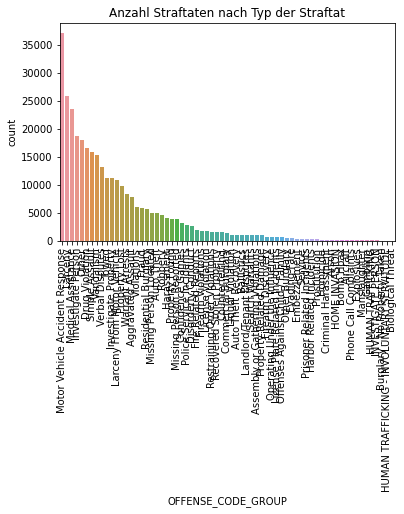

In [40]:
plot = sns.countplot(x="OFFENSE_CODE_GROUP",
              data = df,
              order = df['OFFENSE_CODE_GROUP'].value_counts().index)

plot.set_title("Anzahl Straftaten nach Typ der Straftat")

_ = plt.setp(plot.get_xticklabels(), rotation=90)

### Wie hat sich die Zahl der schweren Straftaten im Laufe der Jahre entwickelt?

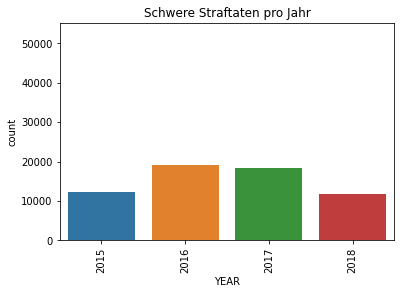

In [41]:
table = df.groupby(["OFFENSE_CODE_GROUP"]).INCIDENT_NUMBER.count().to_frame()
table = table.sort_values('INCIDENT_NUMBER', ascending=False)
table = df.groupby(["UCR_PART", "YEAR"]).INCIDENT_NUMBER.count()
table.T.plot(kind='bar', stacked=True)

table = df[df['UCR_PART'] == "Part One"]
#table = table.groupby(["YEAR"], as_index=False).INCIDENT_NUMBER.count()
plot = sns.countplot(x="YEAR", data = table)
_ = plot.set_title("Schwere Straftaten pro Jahr")

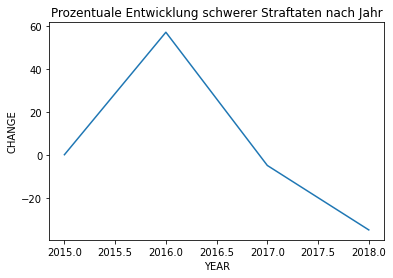

In [42]:
# Differenz zwischen jedem Jahrt
change = table["YEAR"].value_counts().sort_index().to_frame(name="COUNT")
change["YEAR"] = change.index
change["CHANGE"] = change["COUNT"].pct_change().mul(100).round().fillna(0)
plot = sns.lineplot(x=change["YEAR"], y=change["CHANGE"], data=change)
_ = plot.set_title("Prozentuale Entwicklung schwerer Straftaten nach Jahr")

Die meisten Straftaten im Zeitraum zwischen 2015-2018 fanden in den Jahren 2016 und 2017. Der groesste Anstieg gab es zwischen 2015 und 2016. Ab 2016 nahm die Anzahl stetig ab.

### Warum ist die Gesamtzahl 2015 und 2018 (so) niedrig?

In [43]:
years = sorted(set(df["YEAR"]))
count_per_year = [len(df[df["YEAR"] == year]) for year in years]

pd.DataFrame(data={"YEAR" : list(years), "COUNT": count_per_year})

,YEAR,COUNT
0,2015,53388
1,2016,99114
2,2017,100886
3,2018,65685


Da es in  den Jahren 2015 und 2018 deutlich weniger generelle Einträge gibt als 2016 und 2017.

### In welchen Stadtgebieten werden, aufgeschlüsselt nach Jahr, die meisten Straftaten begangen?

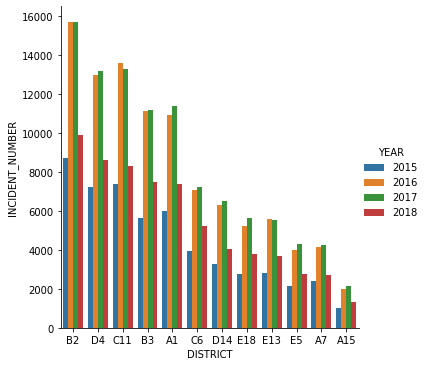

In [44]:
table = df.groupby(["DISTRICT", "YEAR"],  as_index=False).INCIDENT_NUMBER.count()
table = table.sort_values(['YEAR', 'INCIDENT_NUMBER'], ascending=False)

plot = sns.catplot(data=table, kind="bar", x="DISTRICT", y="INCIDENT_NUMBER", hue="YEAR")

### In welchen Stadtgebieten werden die meisten schweren Straftaten ('Part One') begangen?

<AxesSubplot:xlabel='DISTRICT', ylabel='count'>

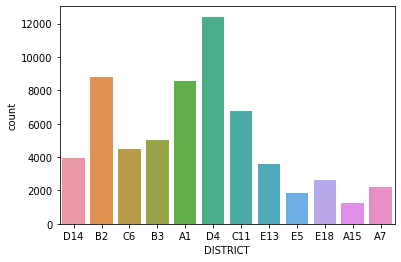

In [60]:
table = df[df['UCR_PART'] == "Part One"]
_ = sns.countplot(x="DISTRICT", data=table)

Die meisten schweren Straftaten werden in den Stadtgebieten D4, B2, und A1. Wobei in D4 deutlich mehr begangen wurden.

### Welche Arten von schweren Straftaten ('Part One') treten in dem Stadtgebiet 'B2' am häufigsten auf? 

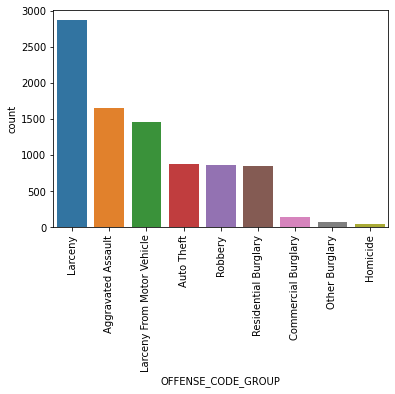

In [61]:
filtered = df[(df['UCR_PART'] == "Part One") & (df['DISTRICT'] == "B2")]

plot = sns.countplot(x="OFFENSE_CODE_GROUP",
              data = filtered,
              order = filtered['OFFENSE_CODE_GROUP'].value_counts().index)

_ = plt.setp(plot.get_xticklabels(), rotation=90)

# Leitfragen 2/3

3. Existieren (a) Uhrzeiten, (b) Tage oder (c) Monate an denen mehr
schwere Verbrechen ('Part One') stattfinden?
• Finden Straftaten eher nachts oder tagsüber statt?
• Wann werden somit die meisten Polizisten benötigt

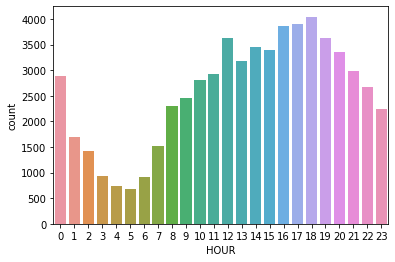

In [62]:
filtered = df[df['UCR_PART'] == "Part One"]

plot = sns.countplot(x="HOUR", data = filtered)

Die meisten Straftaten finden Nachmittags und Abends statt. Die wenigstens in der Nacht und fruehen Morgen. 

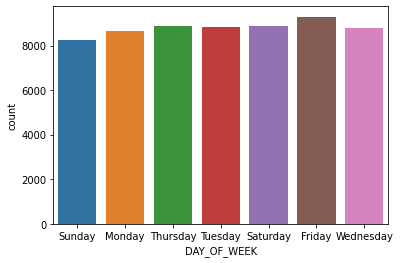

In [63]:
plot = sns.countplot(x="DAY_OF_WEEK", data = filtered)

Es gibt relativ wenig Unterschiede zwischen den Wochentagen.

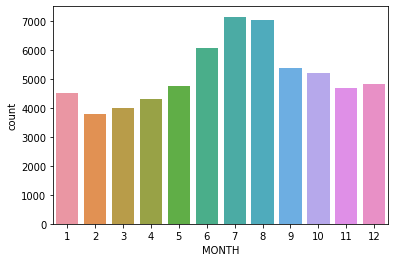

In [64]:
plot = sns.countplot(x="MONTH", data = filtered)

Die meisten Verbrechen finden in den Sommermonaten statt.

4. Welche leichten Straftaten ('Part Tree') benötigen (vermutlich)
Verkehrspolizisten?
• Welches sind die 5 Straßen, in denen die meisten Verkehrspolizisten benötigt
werden?

,INCIDENT_NUMBER
STREET,
BLUE HILL AVE,1254
WASHINGTON ST,1142
DORCHESTER AVE,819
CENTRE ST,620
COMMONWEALTH AVE,617


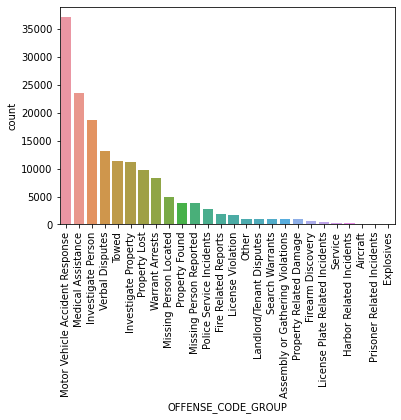

In [65]:
filtered = df[df['UCR_PART'] == "Part Three"]

table = filtered.groupby(["OFFENSE_CODE_GROUP"]).INCIDENT_NUMBER.count().to_frame()
table = table.sort_values('INCIDENT_NUMBER', ascending=False)

plot = sns.countplot(x="OFFENSE_CODE_GROUP",
              data = filtered,
              order = filtered['OFFENSE_CODE_GROUP'].value_counts().index)
plt.setp(plot.get_xticklabels(), rotation=90)


filtered.OFFENSE_CODE_GROUP.unique()
filtered = filtered[filtered['OFFENSE_CODE_GROUP'].isin(["Motor Vehicle Accident Response", 'License Plate Related Incidents'])]
table = filtered.groupby(["STREET"]).INCIDENT_NUMBER.count().to_frame()
table = table.sort_values('INCIDENT_NUMBER', ascending=False)
table[0:5]

5. Wie hat sich die Anzahl der Schießereien in den letzten Jahren
entwickelt?
• In welchem Bezirk finden die meisten Schießereien statt?
• In welcher Straße finden die meisten Schießereien statt?
• Zu welchen Uhrzeiten finden die meisten Schießereien statt?

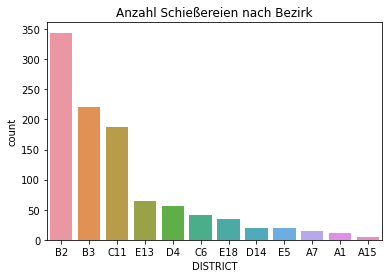

In [66]:
df.SHOOTING.unique()
filtered = df[df['SHOOTING'] == "Y"]


plot = sns.countplot(x="DISTRICT",
              data = filtered,
              order = filtered['DISTRICT'].value_counts().index).set_title("Anzahl Schießereien nach Bezirk")

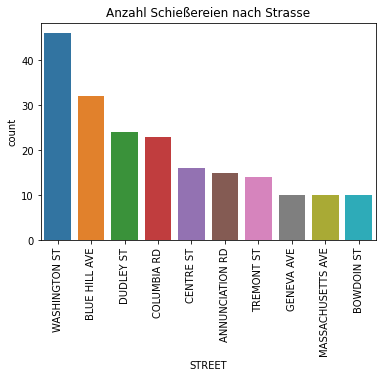

In [67]:
plot = sns.countplot(x="STREET",
              data = filtered,
              order = filtered['STREET'].value_counts().iloc[:10].index)
plot.set_title("Anzahl Schießereien nach Strasse")
_ = plt.setp(plot.get_xticklabels(), rotation=90)

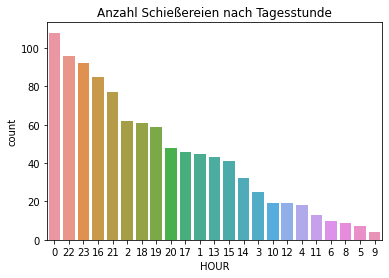

In [68]:
plot = sns.countplot(x="HOUR",
              data = filtered,
              order = filtered['HOUR'].value_counts().index)
_ = plot.set_title("Anzahl Schießereien nach Tagesstunde")